# **This notebook contains:**
- **Pytorch basic operation**
- **Simulate Forward propagation**
- **Backpropagation by auto-differentiation**
- **Fully connected neural network**
- **Activation Functions**
- **Loss Function**
- **Loading & Preparing a dataset in PyTorch**
- **Training a neural network**
- **Convolution operator**
- **Pooling operators**
- **Build CNN**
- **Build AlexNet**

In [1]:
import torch
# create torch tensor
first_tensor = torch.tensor([[2, 3, 5], [1, 2, 7]])
first_tensor

tensor([[2, 3, 5],
        [1, 2, 7]])

In [2]:
first_tensor.shape

torch.Size([2, 3])

In [3]:
import numpy as np
# create numpy array
np.array([[2, 3, 5], [1, 2, 7]])

array([[2, 3, 5],
       [1, 2, 7]])

In [4]:
t = torch.rand(2, 3)
a = np.random.rand(2, 2)

print('Torch tensor:   ', t)
print('Tensor shape:   ', t.shape, '\n')
print('Numpy array:   ', a)
print('Array:  ',a.shape)

Torch tensor:    tensor([[0.6990, 0.5702, 0.3873],
        [0.1502, 0.4018, 0.0792]])
Tensor shape:    torch.Size([2, 3]) 

Numpy array:    [[0.96179032 0.42804095]
 [0.79299382 0.57124486]]
Array:   (2, 2)


In [5]:
# tensor multiplication
t1 = torch.rand(3, 2)
t2 = torch.rand(2, 1)
print(torch.matmul(t1, t2), '\n')
print(t1 @ t2)

tensor([[0.2066],
        [0.0769],
        [0.1821]]) 

tensor([[0.2066],
        [0.0769],
        [0.1821]])


In [6]:
t1 = torch.rand(3, 2)
t2 = torch.rand(3, 2)
print(t1 * t2)

tensor([[0.3926, 0.0774],
        [0.2750, 0.0247],
        [0.6042, 0.0652]])


In [7]:
print(torch.zeros(2, 2))
print(np.zeros((2, 2)))

tensor([[0., 0.],
        [0., 0.]])
[[0. 0.]
 [0. 0.]]


In [8]:
print(torch.eye(2))

tensor([[1., 0.],
        [0., 1.]])


In [9]:
print(np.identity(2))

[[1. 0.]
 [0. 1.]]


In [10]:
# Convert from numpy array to torch tensor
np_arr = np.array([[2,3], [5,3]])
tt = torch.from_numpy(np_arr)
print(type(tt))

<class 'torch.Tensor'>


In [11]:
# Convert from torch tensor to numpy array
tt = torch.tensor([[1, 7],
                   [3, 0]])

np_arr = tt.numpy()
print(type(np_arr))

<class 'numpy.ndarray'>


#### Simulate Forward propagation


<a href="https://assets.datacamp.com/production/repositories/4094/datasets/ab707279d7be2835c17787a38c6e2e54f6d89409/graph_exercise.jpg">link text</a>


In [12]:
# Initialize tensors x, y and z
x = torch.rand(1000, 1000)
y = torch.rand(1000, 1000)
z = torch.rand(1000, 1000)

# Multiply x with y
q = torch.matmul(x, y)

# Multiply elementwise z with q
f = z * q

mean_f = torch.mean(f)
print(f)
print(mean_f)

tensor([[195.3484, 105.8450, 220.1962,  ...,  90.0720,  34.4862,  23.8236],
        [ 32.6357, 146.4996, 164.5282,  ...,  65.9381,  16.0391, 108.1882],
        [185.7217, 143.6514, 238.8120,  ...,  59.0266, 154.9491, 134.7107],
        ...,
        [ 63.1591, 110.9097,  53.8669,  ...,  55.8070, 211.8040,  30.2908],
        [162.6222, 226.2507, 234.1068,  ...,  53.0186,  71.7053, 202.5698],
        [  0.7746,  78.2449, 226.1912,  ...,  84.3580,  42.3264, 165.2709]])
tensor(124.7616)


### Backpropagation by auto-differentiation

In [13]:
# Initialize x, y and z to values 4, -3 and 5
x = torch.tensor(4., requires_grad=True)
y = torch.tensor(-3., requires_grad=True)
z = torch.tensor(5., requires_grad=True)

# Set q to sum of x and y, set f to product of q with z
q = x + y
f = q * z

# Compute the derivatives
f.backward()

# Print the gradients
print("Gradient of x is: " + str(x.grad))
print("Gradient of y is: " + str(y.grad))
print("Gradient of z is: " + str(z.grad))
# Please read the worning
print(f.grad)

Gradient of x is: tensor(5.)
Gradient of y is: tensor(5.)
Gradient of z is: tensor(1.)
None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [14]:
print(f.retain_grad())

None


### Fully connected neural network



In [15]:
input_layer = torch.rand(10)

# Initialize random weights
w1 = torch.rand(10, 20)
w2 = torch.rand(20, 20)
w3 = torch.rand(20, 4)

# calculate values in each layer
h1 = torch.matmul(input_layer, w1)
h2 = torch.matmul(h1, w2)
output_layer = torch.matmul(h2, w3)
print(output_layer)

tensor([295.9305, 309.3376, 310.7139, 246.0047])


In [16]:
import torch
import torch.nn as nn
"""
 Parent class can be referred to with the use of the super() function. 
 The super function returns a temporary object of the superclass that allows access to all of its methods to its child class.
"""
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(10, 20)
    self.fc2 = nn.Linear(20, 20)
    self.output = nn.Linear(20, 4)

  def forward(self, x):
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.output(x)
    return x

In [17]:
input_layer = torch.rand(10)
net = Net()
result = net(input_layer)
result

tensor([-0.0031, -0.1114, -0.0127,  0.0003], grad_fn=<AddBackward0>)

### Activation Functions

In [18]:
import torch.nn as nn

relu = nn.ReLU()
tensor_1 = torch.tensor([[2.0, -4.0]])
print(relu(tensor_1))

tensor([[2., 0.]])


In [19]:
input_layer = torch.tensor([[ 0.0401, -0.9005,  0.0397, -0.0876]])
weight_1 = torch.tensor([[-0.1094, -0.8285,  0.0416, -1.1222],
                          [ 0.3327, -0.0461,  1.4473, -0.8070],
                          [ 0.0681, -0.7058, -1.8017,  0.5857],
                          [ 0.8764,  0.9618, -0.4505,  0.2888]])

weight_2 = torch.tensor([[ 0.6856, -1.7650,  1.6375, -1.5759],
                        [-0.1092, -0.1620,  0.1951, -0.1169],
                        [-0.5120,  1.1997,  0.8483, -0.2476],
                        [-0.3369,  0.5617, -0.6658,  0.2221]])

weight_3 = torch.tensor([[ 0.8824,  0.1268,  1.1951,  1.3061],
                        [-0.8753, -0.3277, -0.1454, -0.0167],
                        [ 0.3582,  0.3254, -1.8509, -1.4205],
                        [ 0.3786,  0.5999, -0.5665, -0.3975]])

##### Adding non-linear function results the same results in the following example

In [20]:
# Calculate the first and second hidden layer
hidden_1 = torch.matmul(input_layer, weight_1)
hidden_2 = torch.matmul(hidden_1, weight_2)

# Calculate the output
output = torch.matmul(hidden_2, weight_3)
print(output)

# Calculate weight_composed_1 and weight
weight_composed_1 = torch.matmul(weight_1, weight_2)
weight = torch.matmul(weight_composed_1, weight_3)

# Multiply input_layer with weight
print(torch.matmul(input_layer, weight))

tensor([[0.2653, 0.1311, 3.8219, 3.0032]])
tensor([[0.2653, 0.1311, 3.8219, 3.0032]])


##### Add relu to apply the non-linearity

In [21]:
# Instantiate non-linearity
relu = nn.ReLU()

# Apply non-linearity on hidden_1 and hidden_2
hidden_1_activated = relu(torch.matmul(input_layer, weight_1))
hidden_2_activated = relu(torch.matmul(hidden_1_activated, weight_2))
print(torch.matmul(hidden_2_activated, weight_3))

# Apply non-linearity to the product of first two weights. 
weight_composed_1_activated = relu(torch.matmul(weight_1, weight_2))

# Multiply `weight_composed_1_activated` with `weight_3
weight = torch.matmul(weight_composed_1_activated, weight_3)

# Multiply input_layer with weight
print(torch.matmul(input_layer, weight))

tensor([[-0.2770, -0.0345, -0.1410, -0.0664]])
tensor([[-0.2117, -0.4782,  4.0438,  3.0417]])


### Loss Function

In [22]:
# Take a Look on chapter2 page 10

In [23]:
"""
Predicted scores are -1.2 for class 0 (cat), 0.12 for class 1 (car) and 4.8 for class 2 (frog). 
The ground truth is class 2 (frog). Compute the loss function in PyTorch.
"""

# Initialize the scores and ground truth
logits = torch.tensor([[-1.2, 0.12, 4.8]])
ground_truth = torch.tensor([2])

# Instantiate cross entropy loss
criterion = nn.CrossEntropyLoss()

# Compute and print the loss
loss = criterion(logits, ground_truth)
print(loss)

tensor(0.0117)


### 1) Preparing a dataset in PyTorch

In [24]:
import torchvision # a package which deals with datasets and pretrained neural nets
import torch.utils.data
import torchvision.transforms as transforms

In [25]:
# Transformation of images to torch tensors
# Define the values for standardizing the images, the mean and standard deviation of each channel.
# Means and Standard deviation are pre-calculated
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize( (0.4914, 0.48216, 0.44653), 
                                                      (0.24703, 0.24349, 0.2619) )
])

In [26]:
# load CIFAR dataset from torchvision
# Set the download flag to True, which tells the PyTorch that if dataset is not in the specified folder, to download and put it there.
# set transform to transform, essentially transforming images to torch tensors by applying the transformation we defined in the previous cell.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [27]:
# Define train and test loaders
trainLoader_CIFAR10 = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=4)
testLoader_CIFAR10 = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [28]:
# Display trainset shape
print(trainLoader_CIFAR10.dataset.data.shape)
# Display testset shape
print(testLoader_CIFAR10.dataset.data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [29]:
print(testLoader_CIFAR10.batch_size)

32


In [30]:
# Take a look at the type of random sampler
print(testLoader_CIFAR10.sampler)

(-0.5, 31.5, 31.5, -0.5)

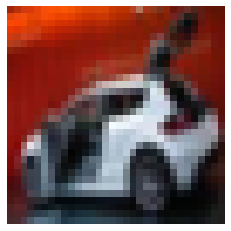

In [31]:
import matplotlib.pyplot as plt
dataset = testLoader_CIFAR10.dataset.data
img = dataset[6, :, :, :]

plt.imshow(img)
plt.axis('off')

In [32]:
# Load Mnist dataset
# Transform the data to torch tensors and normalize it 
transform = transforms.Compose([transforms.ToTensor(),
								transforms.Normalize((0.1307), ((0.3081)))])

# Prepare training set and testing set
trainset = torchvision.datasets.MNIST('mnist', train=True, 
									  download=True, transform=transform)
testset = torchvision.datasets.MNIST('mnist', train=False, 
									  download=True, transform=transform)

# Prepare training loader and testing loader
trainloader_MNIST = torch.utils.data.DataLoader(trainset, batch_size=32,
										  shuffle=True, num_workers=0)
testloader_MNIST = torch.utils.data.DataLoader(testset, batch_size=32,
										 shuffle=False, num_workers=0)       

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [33]:
# Compute the shape of the training set and testing set
trainset_shape = trainloader_MNIST.dataset.train_data.shape
testset_shape = testloader_MNIST.dataset.test_data.shape

# Print the computed shapes
print(trainset_shape, testset_shape)

# Compute the size of the minibatch for training set and testing set
trainset_batchsize = trainloader_MNIST.batch_size
testset_batchsize = testloader_MNIST.batch_size

# Print sizes of the minibatch
print(trainset_batchsize, testset_batchsize)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
32 32


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


### 2) Training neural networks

##### 2_0) Data preparation

In [34]:
# Transform the data to torch tensors and normalize it 
transform = transforms.Compose([transforms.ToTensor(),
								transforms.Normalize((0.1307), ((0.3081)))])

# Prepare training set and testing set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
									  download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
									  download=True, transform=transform)

# Prepare training loader and testing loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
										  shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
										 shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [35]:
num_unique_classes = len(np.unique(np.array([trainloader.dataset.targets])))
print(num_unique_classes)

10


##### 2_1) Build the model 

In [36]:
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(32*32*3, 500)
    self.fc2 = nn.Linear(500, num_unique_classes)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

##### 2_2) Train the model

In [37]:
import torch.optim as optim

net = Net()
# Our loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=3e-4)

for epoch in range(10): # Loop over number of epochs
  for _, batch in enumerate(trainloader, 0): # Loop over Batches
    inputs, labels = batch
    # Put all the images into vectors
    inputs = inputs.view(-1, 32*32*3)

    # zero_grad in order to not accumulate gradients from the previous iterations.
    optimizer.zero_grad()

    # Forward
    outputs = net(inputs)

    # Compute the gradients(backward)
    loss = criterion(outputs, labels)
    
    # Using the loss start backpropagation
    loss.backward()

    # Change weights(optimization)
    optimizer.step()

##### 2_3) Make predictions

In [38]:
correct, total = 0, 0
predictions = []
# Set the network in evaluation|test mode
net.eval()

for i, batch in enumerate(testloader):
  inputs, labels = batch
  inputs = inputs.view(-1, 32*32*3)
  outputs = net(inputs)
  # We get the class with the highest score (using max function) as prediction
  _, predicted = torch.max(outputs.data, 1) # We set 1 to get the max from each row
  predictions.append(predicted)
  # Compute the accuracy
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print(100*correct/total)

51.55


### Convolution operator
**The convolutions are used to extract features from the image**

##### OOP based

In [39]:
image = torch.rand(16, 3, 32, 32)
conv_filter = torch.nn.Conv2d(in_channels=3,
                              out_channels=1, # Number of filters
                              kernel_size = 5,
                              stride=1,
                              padding=0)

output_features = conv_filter(image)
print(output_features.shape)

torch.Size([16, 1, 28, 28])


##### Functional based

In [40]:
import torch.nn.functional as F

# 16 images with 3 channels each channel has 32 by 32 pixels.
image = torch.rand(16, 3, 32, 32)
filter = torch.rand(1, 3, 5, 5)
out_feat_F = F.conv2d(image, filter, stride=1, padding=0)
print(out_feat_F.shape)

torch.Size([16, 1, 28, 28])


### Pooling operators
**The pooling is a way of feature selection, choosing the most dominant features from the image, or combining different features. Additionally, they lower the resolution of the images, making the computations more efficient.**

##### Max-pooling with OOP way

In [41]:
img.shape

(32, 32, 3)

In [42]:
# Multiple brackets are needed, because the image needs to have 4 dimensions (for minibatch size, depth, height and width)
img = torch.tensor([[[ [3, 1, 3, 5], 
                       [6, 0, 7, 9],
                       [3, 2, 1, 4], 
                       [0, 2, 4, 3]  ]]], dtype=torch.float32)

max_pooling = torch.nn.MaxPool2d(2)
out_features = max_pooling(img)
print(output_features)

tensor([[[[-2.7647e-01, -5.0015e-01, -9.1218e-02,  ...,  3.4642e-01,
            1.9535e-01, -4.1070e-01],
          [-4.3369e-05, -4.1966e-01,  4.4845e-02,  ..., -2.2759e-01,
            9.0384e-02, -1.2126e-01],
          [-1.9917e-03,  1.5518e-01, -3.3923e-03,  ..., -2.7121e-01,
           -2.9392e-01,  5.8523e-02],
          ...,
          [ 5.5139e-02,  1.0205e-01,  1.5113e-01,  ..., -9.2317e-02,
            1.0116e-01, -7.0482e-02],
          [ 2.3433e-01, -2.2305e-01, -9.4152e-02,  ..., -1.5470e-01,
            9.3899e-02,  8.4774e-02],
          [ 2.1346e-01,  2.5858e-01,  1.7117e-01,  ...,  3.2449e-02,
           -1.2692e-02, -3.6423e-01]]],


        [[[-4.0638e-02, -9.1425e-02,  9.5523e-02,  ...,  3.0670e-01,
           -1.0240e-01,  8.7659e-02],
          [ 1.1801e-01, -3.3826e-02, -4.8711e-03,  ...,  1.2767e-01,
            6.4231e-02, -3.3549e-01],
          [ 1.4029e-02, -1.3877e-01, -4.1281e-01,  ..., -8.2539e-02,
            2.3267e-01,  3.9851e-02],
          ...,
   

##### Max-pooling with Functional way

In [43]:
output_features = F.max_pool2d(img, 2)
print(output_features)

tensor([[[[6., 9.],
          [3., 4.]]]])


In [44]:
# Build a pooling operator with size `2`.
avg_pooling = torch.nn.AvgPool2d(2)

# Apply the pooling operator
output_feature = avg_pooling(img)

# Use pooling operator in the image
output_feature_F = F.avg_pool2d(img, 2)

# print the results of both cases
print(output_feature)
print(output_feature_F)

tensor([[[[2.5000, 6.0000],
          [1.7500, 3.0000]]]])
tensor([[[[2.5000, 6.0000],
          [1.7500, 3.0000]]]])


### Convolutional Neural Networks

##### 1) Building the model

In [45]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()

        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU()
        
        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        
        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Instantiate a fully connected layer
        self.fc = nn.Linear(7 * 7 * 10, num_classes)

    def forward(self, x):
        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7*7*10)

        # Apply the fully connected layer and return the result
        return self.fc(x)

##### 2) Training CNN

In [46]:
trainset = torchvision.datasets.MNIST('mnist', train=True, 
									  download=True, transform=transform)
num_classes = len(trainset.classes)
net = Net(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=3e-4 )

for i, data in enumerate(trainloader_MNIST, 0):
    inputs, labels = data
    optimizer.zero_grad()

    # Compute the forward pass
    outputs = net(inputs)
        
    # Compute the loss function
    loss = criterion(outputs, labels)
        
    # Compute the gradients
    loss.backward()
    
    # Update the weights
    optimizer.step()

##### 3) Make predictions

In [47]:
net.eval()

# Iterate over the data in the test_loader
for i, data in enumerate(testloader_MNIST):

    # Get the image and label from data
    image, label = data

    # Make a forward pass in the net with your image
    output = net(image)

    # Argmax the results of the net
    _, predicted = torch.max(output.data, 1)

### AlexNet

In [56]:
class AlexNet(nn.Module):
  def __init__(self, num_classes=1000):
    super(AlexNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)
    self.relu = nn.ReLU(inplace=True)
    self.maxpooling = nn.MaxPool2d(kernal_size=3, stride=2)
    self.conv2 = nn.Conv2d(64, 192, kernel_size=5, padding=2)
    self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
    self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
    self.avgpool = nn.AdaptiveMaxPool2d((6, 6))
    self.fc1 = nn.Linear(256*6*6, 4096)
    self.fc2 = nn.Linear(4096, 4096)
    self.fc3 = nn.Linear(4096, num_classes)


  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.maxpooling(x)
    x = self.relu(self.conv2(x))
    x = self.maxpooling(x)
    x = self.relu(self.conv3(x))
    x = self.relu(self.conv4(x))
    x = self.relu(self.conv5(x))
    x = self.maxpooling(x)
    x = self.avgpool(x)
    x = self.view(x.size(0), 256*6*6)
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    return self.fc3(x)

### The sequential module
**The sequential module lets you write tens of lines of code vs hundreds of them.**

In [48]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Declare all the layers for feature extraction
        self.features = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1), 
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1), 
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1),
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1),
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True))
        
        # Declare all the layers for classification
        self.classifier = nn.Sequential(nn.Linear(7 * 7 * 40, 1024), nn.ReLU(inplace=True),
                                       	nn.Linear(1024, 2048), nn.ReLU(inplace=True),
                                        nn.Linear(2048, 10))
        
    def forward(self, x):
      
        # Apply the feature extractor in the input
        x = self.features(x)
        
        # Squeeze the three spatial dimensions in one
        x = x.view(-1, 7 * 7 * 40)
        
        # Classify the images
        x = self.classifier(x)
        return x

### The problem of overfitting
**To avoid overfitting we evaluate the model on validation data before using it for predictions**

In [49]:
# How to split training data to training and validation.
# Shuffle the indices
indices = np.arange(60000)
np.random.shuffle(indices)

train_data = torchvision.datasets.MNIST('mnist', download=True, train=True,
                   transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]))

# Build the train loader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[:55000]))

# Build the validation loader
val_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[55000:]))

### 1) Regularization techniques

##### L2 Regularization

In [50]:
optimizer = optim.Adam(net.parameters(), lr=3e-4, weight_decay=1e-4)

### 2) Dropout
**Units are forced to not be dependent on the surrounding units. It can also be considered that in each iteration, the architecture of the neural network is changing (because different neurons are removed from computations with each iteration). Typically, dropout is used in fully-connected layers, while is rarely used in convolutional layers.**

In [51]:
class Net(nn.Module):
    def __init__(self):
        
        # Define all the parameters of the net
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 200),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(200, 500),
            nn.ReLU(inplace=True),
            nn.Linear(500, 10))
        
    def forward(self, x):
    
    	# Do the forward pass
        return self.classifier(x)

### 3) Batch-normalization
**It computes the mean and the variance of the minibatch for each feature, and then it normalizes the features based on those stats.**

In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Implement the sequential module for feature extraction
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(10), # The argument in the BatchNorm2d() is the number of channels.
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(20))
        
        # Implement the fully connected layer for classification
        self.fc = nn.Linear(in_features=7*7*20, out_features=10)

### 4) Early-stopping
**It simply checks the accuracy of the network in the validation set at the end of each epoch, and if after n epochs the performance of the net hasn't increased (or it has decreased), then training is terminated. It is important to save the network every time the accuracy improves, so that at the end of the training we use the best performing network.**